# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

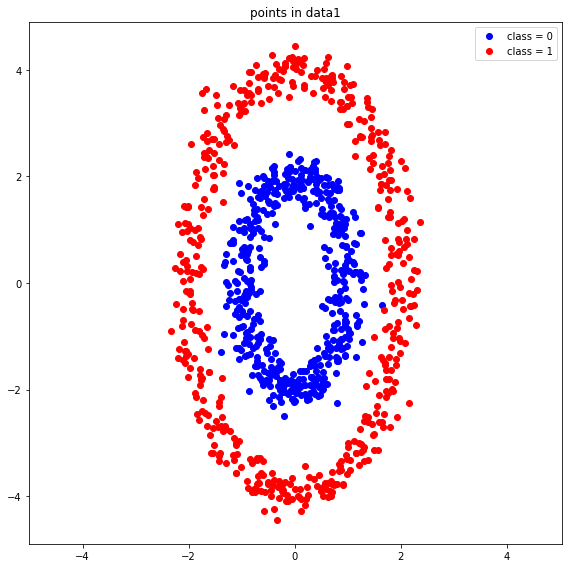

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

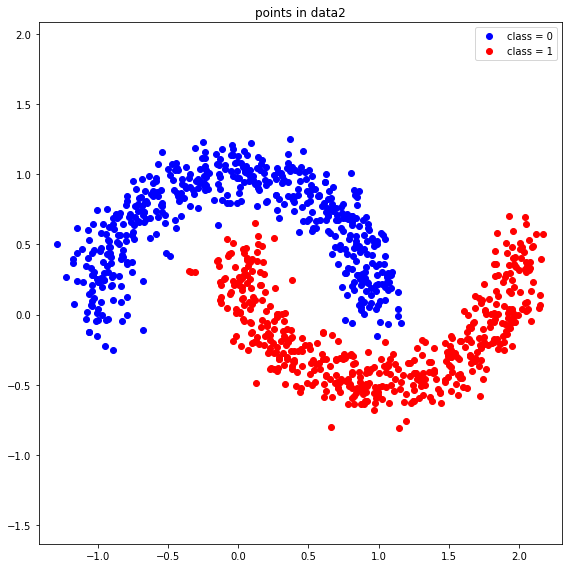

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [5]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    
    t1=(x-np.mean(x))/np.max(x-np.mean(x))
    t2=(y-np.mean(y))/np.max(y-np.mean(y))
    t1 = t1*1.14 ## more precisely
    t2 = t2/0.88 ## more precisely for variance
    
    t3=np.power(t1,2)+np.power(t2,2)
    t3 = np.log2(t3)
    
    t3[486] -=0.5 ## recalculate for two congestion part point number 306 486 for accuracy
    #t3[306] -=0.3 ## 
    
    
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,t3.T) #max(t3),min(t3)max(t1),min(t1),max(t2),min(t2)#
    #return feature
print(compute_feature1(data1_point))


(1, array([-2.57681888e+00, -2.47696267e+00, -2.03363919e+00, -1.80262888e+00,
       -1.50988125e+00, -2.94453016e+00, -1.30207052e+00, -2.15775467e+00,
       -2.08907180e+00, -3.36826383e+00, -2.37249657e+00, -1.70531717e+00,
       -1.82921854e+00, -2.25034534e+00, -2.75139707e+00, -3.01038307e+00,
       -1.67096366e+00, -1.73857354e+00, -1.51915842e+00, -1.98783284e+00,
       -1.46319702e+00, -3.37344702e+00, -1.62452882e+00, -2.02057825e+00,
       -2.79910162e+00, -1.24570350e+00, -1.82843787e+00, -2.07308893e+00,
       -3.49401916e+00, -1.27916281e+00, -2.14495983e+00, -2.20314085e+00,
       -3.02156347e+00, -1.94025851e+00, -1.54985114e+00, -2.14766821e+00,
       -2.26924200e+00, -1.86390322e+00, -2.15807222e+00, -2.07205785e+00,
       -1.35180198e+00, -1.76063246e+00, -2.35371548e+00, -1.91084998e+00,
       -2.02510820e+00, -1.95783258e+00, -2.52440666e+00, -2.30338201e+00,
       -2.09977919e+00, -3.45503444e+00, -1.84964666e+00, -1.70341096e+00,
       -2.10771213e+0

In [6]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    x = x-np.mean(x)
    y= y-np.mean(y)
    x = x/np.max(np.abs(x))
    x -= (np.max(x)+np.min(x))/2
    x=(x/np.max(x))
    y = y/np.max(np.abs(y))
    y -=(np.max(y)+np.min(y))/2
    y =(y/np.max(y))
    k= np.zeros(len(point))
    error =1.77 # value error
    error2  =1/4
   
    a= np.sqrt(np.power((x+1),2) +np.power((1-error2-y)*error,2))
    b= np.sqrt(np.power((x-1/3),2) +np.power((1-error2-y)*error,2))
    c=np.sqrt(np.power((x+1/3),2) +np.power((-1+error2-y)*error,2))
    d=np.sqrt(np.power((x-1),2) +np.power((-1+error2-y)*error,2))
    #a= np.power((x+5/6),2) +np.power((2/3-y),2)
    #b= np.power((x-1/6),2) +np.power((2/3-y),2)
    #c=np.power((x+1/6),2) +np.power((2/3+y),2)
    #d=np.power((x-5/6),2) +np.power((2/3+y),2)
    k= np.zeros(1000)
    for i in range(1000):
        k[i] = (a[i]+b[i]-c[i]-d[i])
        #k[i]=min(c[i],d[i])-min(a[i],b[i])
    
        #x   = point[:, 0]
        #y   = point[:, 1]
        #k=np.power(x,3)-(6/4)*(np.power(x,2))-(x/16)+15/32
        #k = 2*k-y
        #k -= (max(k)+min(k))/2

    #a1 = np.sqrt(np.power((x+3/4),2)+np.power((y-3/4),2))
    #b1 = np.sqrt(np.power((x-3/4),2)+np.power((y-3/4),2))
    #c1 = np.sqrt(np.power((x),2)+np.power((y+1/2),2))
    #d1 = np.sqrt(np.power((x-2),2)+np.power((y+1/2),2))
    #for i in range(1000):
        #k[i] = (c1[i]+d1[i]-a1[i]-b1[i])
        #k[i]=min(c1[i],d1[i])-min(a1[i],b1[i])
    k-= (max(k)+min(k))/2
    k= k *3/4
    


   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,k)
    #return feature
print(compute_feature2(data2_point))

(1, array([ 1.26023547e+00,  1.22639718e+00,  1.47485374e+00,  7.29299723e-01,
        1.38654783e+00,  7.44386546e-01,  9.86417638e-01,  3.90108840e-01,
        3.34961190e-01,  8.77603216e-01,  8.47700225e-01,  6.46635702e-01,
        1.37708095e+00,  1.76973529e-01,  9.83151569e-01,  1.82053765e+00,
        3.10329448e-01,  5.16472908e-01,  9.81217885e-02,  1.47798317e+00,
        1.95987241e-01, -2.28582699e-01,  1.97951564e-01,  1.51990475e-01,
       -4.00440076e-01,  8.22281464e-01,  1.29307370e-01, -1.77280547e-01,
        7.19288272e-01,  7.91789233e-01,  1.32630516e-01, -1.22106743e+00,
        4.72418664e-01,  1.75340069e-01, -8.91779754e-02,  1.03089595e+00,
        1.11202999e+00,  1.96671236e-01, -8.59690535e-02,  4.56688493e-01,
        3.85197721e-01, -5.97752202e-01,  9.02922513e-01, -2.32929594e-01,
        1.98059321e-01, -1.01354864e+00,  7.74132234e-01, -8.91287146e-01,
       -3.63563321e-02, -8.40097322e-03, -1.01236061e+00, -1.43387363e-01,
       -1.08079427e-0

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [7]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    #value = np.dot(theta,feature)
    value = theta[0]+theta[1]*feature[1]
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value#.shape #len(theta), len(feature)
print(compute_linear_regression((1.31220787, 1.31220787),compute_feature2(data2_point)))

[ 2.96589877  2.9214959   3.24752255  2.26920071  3.13164684  2.28899775
  2.60659286  1.82411176  1.75174658  2.46380572  2.42456678  2.16072833
  3.11922433  1.54443393  2.6023071   3.7011317   1.71942461  1.98992768
  1.44096405  3.25162901  1.56938387  1.01225985  1.57196147  1.51165097
  0.78674725  2.39121208  1.48188602  1.07957894  2.2560636   2.35119993
  1.48624668 -0.29008643  1.93211936  1.54229049  1.19518783  2.66495765
  2.77142237  1.57028141  1.1993986   1.91147811  1.81766735  0.52783273
  2.4970299   1.00655582  1.57210287 -0.01777863  2.32803028  0.14265386
  1.2645008   1.30118405 -0.01621969  1.12405384  1.2980256   1.69918124
  0.32526341  1.19304267 -0.25867056  1.12395478  0.99095254  1.68316549
  0.57183523  0.72475042 -0.40469911  1.10186604  1.84851897  0.04816326
  0.40306717  0.66017682 -0.95916477  0.77483447  0.25163793 -0.03347489
  1.11674365  0.79516029 -1.24293502 -0.05965813 -2.2651982   1.07407623
  0.71835277  1.42230992  1.40224709 -1.27713289 -0

## define sigmoid function with input

- $z \in \mathbb{R}$

In [8]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 
sigmoid(compute_linear_regression((0.02811796, 0.02811796),compute_feature2(data2_point)))

array([0.51588296, 0.51564533, 0.51738994, 0.5121537 , 0.51676992,
       0.51225969, 0.51395987, 0.50977051, 0.50938299, 0.51319553,
       0.51298547, 0.51157294, 0.51670345, 0.50827277, 0.51393693,
       0.51981656, 0.50920991, 0.51065842, 0.50771862, 0.51741191,
       0.50840639, 0.50542246, 0.50842019, 0.5080972 , 0.5042145 ,
       0.51280691, 0.50793779, 0.50578304, 0.51208337, 0.5125927 ,
       0.50796114, 0.49844601, 0.51034887, 0.50826129, 0.50640226,
       0.51427228, 0.51484213, 0.50841119, 0.50642482, 0.51023835,
       0.509736  , 0.50282757, 0.51337338, 0.5053919 , 0.50842095,
       0.49990476, 0.51246866, 0.5007642 , 0.50677351, 0.50696998,
       0.49991311, 0.50602126, 0.50695307, 0.5091015 , 0.50174243,
       0.50639077, 0.49861431, 0.50602073, 0.50530833, 0.50901573,
       0.50306328, 0.50388241, 0.49783204, 0.50590242, 0.50990121,
       0.50025801, 0.50215922, 0.5035365 , 0.49486194, 0.50415069,
       0.50134802, 0.49982068, 0.5059821 , 0.50425957, 0.49334

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [9]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
print(compute_logistic_regression((0.02811796, 0.02811796), compute_feature2(data2_point)))

[0.51588296 0.51564533 0.51738994 0.5121537  0.51676992 0.51225969
 0.51395987 0.50977051 0.50938299 0.51319553 0.51298547 0.51157294
 0.51670345 0.50827277 0.51393693 0.51981656 0.50920991 0.51065842
 0.50771862 0.51741191 0.50840639 0.50542246 0.50842019 0.5080972
 0.5042145  0.51280691 0.50793779 0.50578304 0.51208337 0.5125927
 0.50796114 0.49844601 0.51034887 0.50826129 0.50640226 0.51427228
 0.51484213 0.50841119 0.50642482 0.51023835 0.509736   0.50282757
 0.51337338 0.5053919  0.50842095 0.49990476 0.51246866 0.5007642
 0.50677351 0.50696998 0.49991311 0.50602126 0.50695307 0.5091015
 0.50174243 0.50639077 0.49861431 0.50602073 0.50530833 0.50901573
 0.50306328 0.50388241 0.49783204 0.50590242 0.50990121 0.50025801
 0.50215922 0.5035365  0.49486194 0.50415069 0.50134802 0.49982068
 0.5059821  0.50425957 0.493342   0.49968041 0.48786773 0.50575357
 0.50384814 0.50761872 0.50751126 0.49315883 0.49962825 0.50453262
 0.4969654  0.49889244 0.49944007 0.49610984 0.4987907  0.50154045

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
compute_residual((-0.53036627, -0.53036627),compute_feature2(data2_point),data2_label)

array([0.26357133, 0.26775829, 0.23832777, 0.33622331, 0.24844418,
       0.3339451 , 0.29914489, 0.39097377, 0.40053257, 0.31438828,
       0.31869145, 0.34893914, 0.24955088, 0.42897023, 0.29959304,
       0.20215918, 0.40486302, 0.36977384, 0.44375747, 0.23797604,
       0.42546418, 0.5093598 , 0.42510328, 0.43361213, 0.54674052,
       0.32238856, 0.43786137, 0.49858878, 0.33774231, 0.32687148,
       0.43723677, 0.7534879 , 0.37705461, 0.42927251, 0.48050275,
       0.29309893, 0.28234111, 0.42533848, 0.47985377, 0.37968275,
       0.39181739, 0.59215627, 0.31078347, 0.51028058, 0.42508349,
       0.69674651, 0.3294914 , 0.66473386, 0.46990671, 0.46437337,
       0.69643038, 0.49156973, 0.46484777, 0.40759449, 0.62957374,
       0.48083363, 0.74678742, 0.49158528, 0.5128059 , 0.40976607,
       0.58424787, 0.55737066, 0.77827323, 0.49506181, 0.38779211,
       0.68346127, 0.61500547, 0.56860598, 0.90565399, 0.54877122,
       0.64358633, 0.69993498, 0.49271815, 0.54530981, 0.97555

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [11]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
compute_loss((0,0),compute_feature1(data2_point),data2_label)

0.6931471805599454

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [12]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h_i=compute_logistic_regression(theta, feature)
    t1=(h_i-label)
    
    k=np.dot(feature[1],t1)
    gradient = (k)/len(label) ## point summation point*(hi-label)/n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient
print(compute_gradient((0.82230769, 0.82230769),compute_feature1(data2_point),data2_label))

0.23571075856131785


## compute the accuracy of the prediction for point with a given model parameter

In [13]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=compute_logistic_regression(theta, feature)
    count = 0
    lenz = len(label)
    for i in range(lenz):
        if t[i] >=0.5:
            discrimination = 1
        else:
            discrimination =0
        if label[i] == discrimination:
            count +=1
        else:
            #print(i)
            #print(feature[1][i])
            print(t[i])

    accuracy = (count/lenz)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
print(compute_accuracy((0.32013687, 0.32013687), compute_feature2(data2_point),data2_label))

0.6733959055390119
0.6710089269894473
0.6883232403168627
0.6349733350703392
0.6822263055327176
0.6360920764835992
0.653831840150044
0.6094557562688547
0.6052455451091122
0.6459056452714577
0.6437131325485524
0.6288178696153376
0.6815689075252481
0.5930992899274262
0.6535951478776905
0.7115570124310873
0.6033599528482853
0.6190407975722946
0.5869932229152101
0.6885381300939278
0.594567442138327
0.5614278957421501
0.5947190223797957
0.5911676852562217
0.5478385294828474
0.6418446543142445
0.589411461653449
0.5654676839186512
0.6342301442866665
0.6395975430749096
0.5896688975743446
0.6157092676654481
0.5929730836295418
0.5723847866287736
0.6570475705591476
0.6628763441829629
0.5946202257501679
0.5726362088961977
0.6145170461644467
0.6090814705599067
0.5321491729767135
0.6477572987968708
0.5610852172389201
0.594727337080607
0.6382935094879497
0.5086998701171723
0.5765185653815019
0.5787020404463261
0.5681318744454709
0.5785141619988248
0.6021774290957854
0.5198280707641919
0.57225668608604

## initialize the gradient descent algorithm

In [14]:
data1_number_iteration   = 1000
data2_number_iteration   = 200

data1_learning_rate   = 0.09
data2_learning_rate   = 0.02

data1_number_feature    = 2
data2_number_feature    = 2 

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [15]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature1 = compute_feature1(data1_point)
    loss=compute_loss(theta1, feature1, data1_label)
    
    theta1      = theta1-data1_learning_rate*compute_gradient(theta1, feature1, data1_label)
    loss1       =loss
    accuracy1 = compute_accuracy(theta1, feature1, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1
print(data1_accuracy_iteration[999])
print(theta1)

print(loss1)

0.5021436003900923
0.5042301615544967
0.5062612513370289
0.5082385038558339
0.5101635980044037
0.5120382381865457
0.5138641374287555
0.515643002890261
0.5173765236951028
0.5190663609417409
0.5207141397011521
0.5223214427903057
0.5238898060998852
0.5254207152589392
0.526915603431044
0.5283758500534813
0.5298027803504615
0.5311976654718124
0.5325617231285614
0.5338961186156995
0.5352019661296467
0.5364803303033382
0.5377322278953649
0.538958629581276
0.5401604618051367
0.5413386086578578
0.5424939137558871
0.5436271820997061
0.5447391818964286
0.5458306463347452
0.5469022753036843
0.5479547370492577
0.5489886697651369
0.5500046831151644
0.5510033596867984
0.5519852563756092
0.5529509057017131
0.5539008170596229
0.5548354779034195
0.5557553548694599
0.5566608948390452
0.5575525259435989
0.5584306585149799
0.5592956859835716
0.5601479857267724
0.5609879198704706
0.5618158360460174
0.5626320681051377
0.5634369367951196
0.5642307503965327
0.565013805325618
0.5657863867033923
0.56654876889340

In [16]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature2 = compute_feature2(data2_point)
    loss=compute_loss(theta2, feature2, data2_label)
    theta2      = theta2-data2_learning_rate*compute_gradient(theta2, feature2,data2_label)
    loss2       =loss
    accuracy2  = compute_accuracy(theta2,feature2,data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2
print(data2_accuracy_iteration[199])
print(theta2)

print(loss2)

0.5099331132814119
0.5097844415470039
0.51087601689728
0.507600211285571
0.5104880628197519
0.5076665069948525
0.5087300206429879
0.5061096458168418
0.5058672899457767
0.5082518862233626
0.5081204887396175
0.5072369578470189
0.5104464712631792
0.5051729710124483
0.508715669647556
0.5123945785673677
0.5057590406047343
0.5066649635226775
0.5048264283688038
0.5108897651727392
0.5052565329539245
0.5033905610090393
0.5052651657952641
0.5050631744218281
0.5026352232932273
0.5080087946426929
0.5049634853181603
0.5036160384535162
0.5075562180332783
0.507874805852198
0.5049780901083378
0.5064713651770388
0.5051657922303934
0.5040032534735824
0.5089254553851549
0.509281945829875
0.505259538985062
0.5040173567511081
0.5064022377642665
0.5060880631703976
0.5017679936902452
0.5083631414899334
0.5033714559622636
0.5052656393661358
0.5077972170516211
0.5004778258188326
0.5042354048522797
0.5043582680574774
0.5037650011576006
0.5043476894985496
0.5056912433402909
0.5010894836803192
0.5039960686078395


___

___

## functions for presenting the results

___

___

In [17]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [18]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [19]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [20]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [21]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [22]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [23]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [24]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [25]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [26]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [27]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [28]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.0230212345
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.3450085235
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9990000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.8500000000
**************************************************
## [RESULT 05]
**************************************************


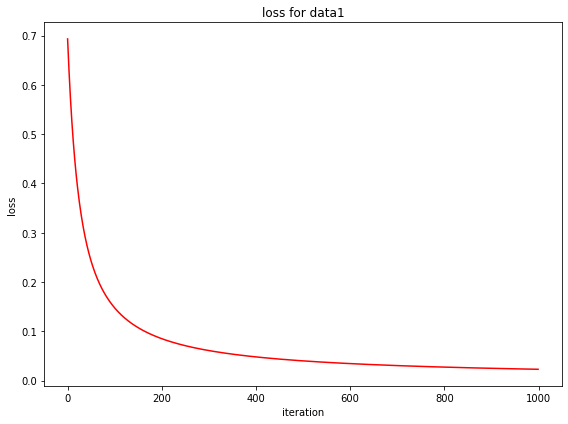

**************************************************
## [RESULT 06]
**************************************************


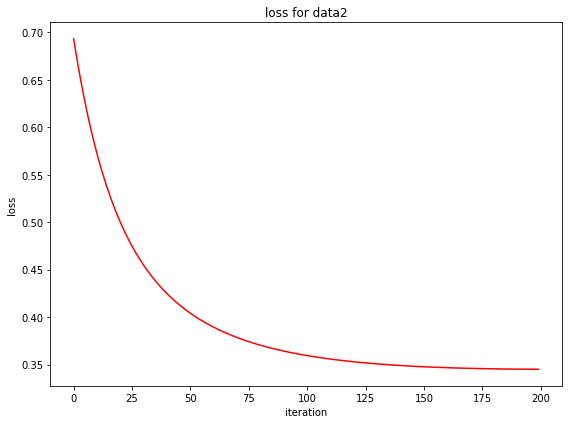

**************************************************
## [RESULT 07]
**************************************************


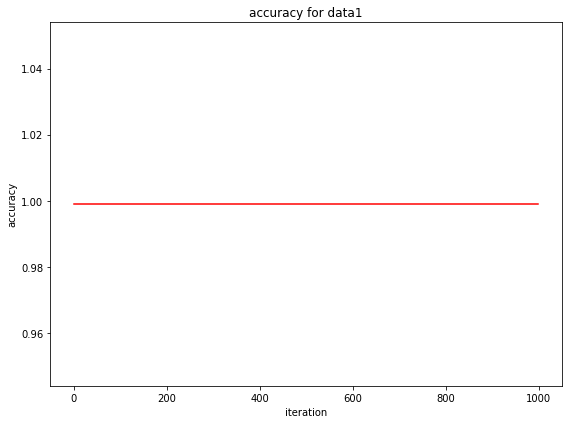

**************************************************
## [RESULT 08]
**************************************************


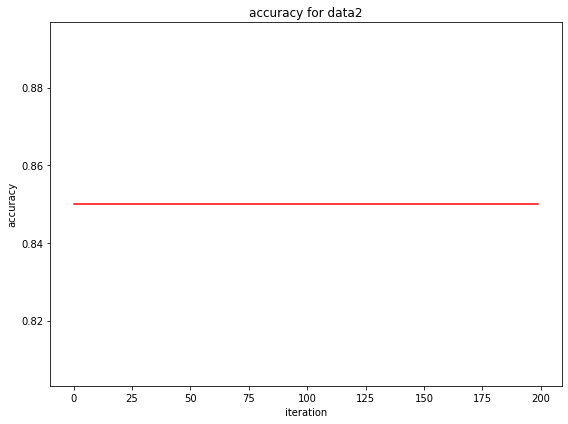

No handles with labels found to put in legend.


**************************************************
## [RESULT 09]
**************************************************


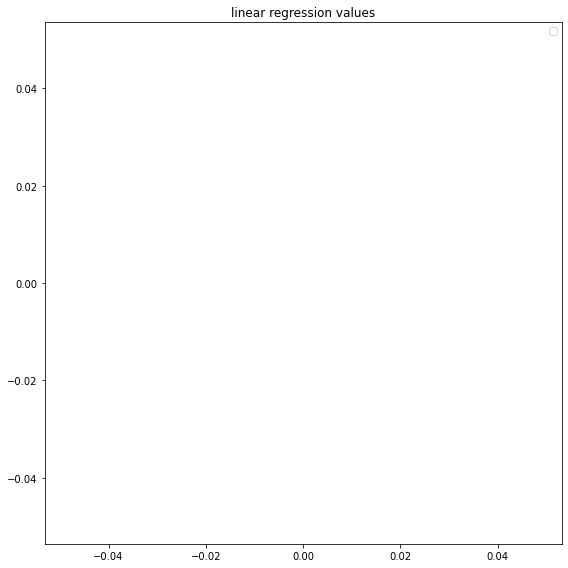

No handles with labels found to put in legend.


**************************************************
## [RESULT 10]
**************************************************


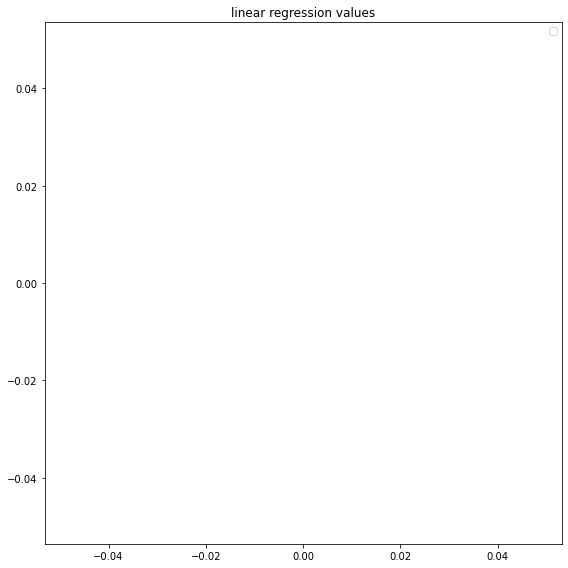

No handles with labels found to put in legend.


**************************************************
## [RESULT 11]
**************************************************


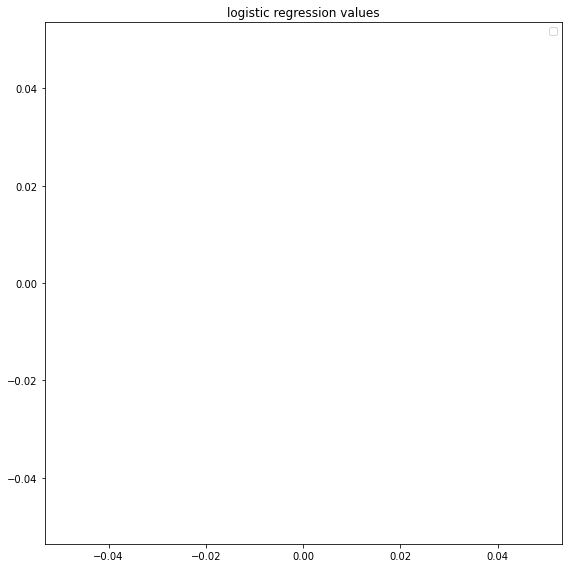

No handles with labels found to put in legend.


**************************************************
## [RESULT 12]
**************************************************


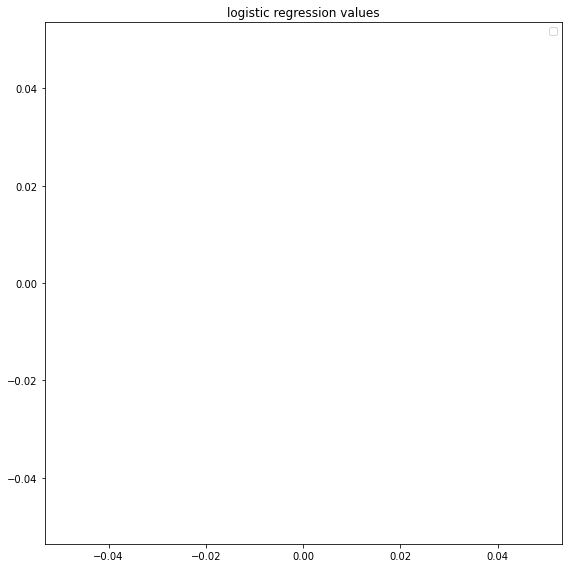

In [29]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)